In [1]:
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 11,7 

Загрузим данные об игроках и статистику сезонов НБА в датафреймы

In [4]:
players = pd.read_csv('Players.csv')
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [79]:
seasons_stats = pd.read_csv('Seasons_Stats.csv')
seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [11]:
player_data = pd.read_csv('player_data.csv')
player_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


Построим следующие графики:
- гистограмма роста игроков
- продолжительность карьеры для разных позиций
- связь количества минут и заработанных очков для нападающих
- количество свободных ударов, двух и трехочковых за сезон по годам
- Топ-10 колледжей по количеству игроков и количество игроков НБА в них

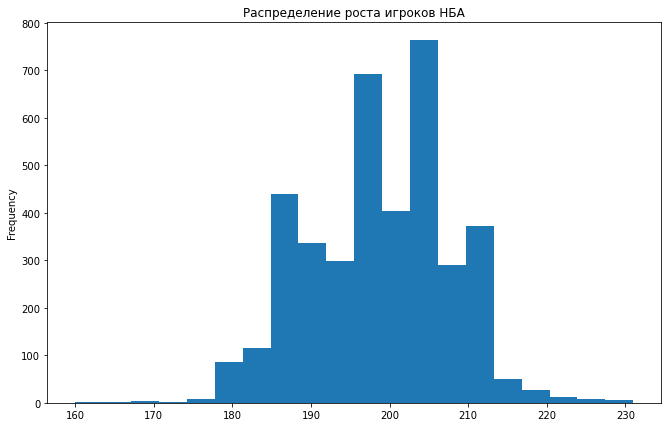

In [7]:
players['height'].plot(kind='hist', title='Распределение роста игроков НБА', bins=20)

Гистограмма хорошо покаывает распределение роста. Видим, что пиков несколько. Можно поисследовать для разных сезонов и позиций

In [9]:
import seaborn as sns

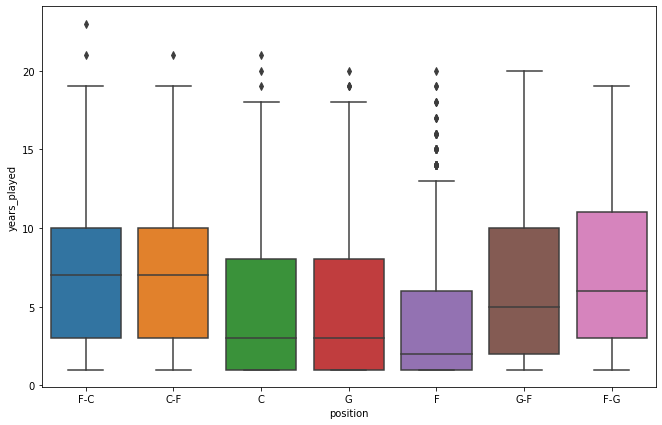

In [12]:
player_data['years_played'] = player_data.apply(lambda x: x['year_end'] - x['year_start']+1, axis=1)

sns.boxplot(x="position", y="years_played", data=player_data)

Ящики с усами хорошо показывают распределение (и его метрики) продолжительности карьеры для разных позиций игроков. Ожидаемо, игроки, менявшие позицию, играют дольше. Активная карьера нападающих коротка, но есть положительные выбросы.

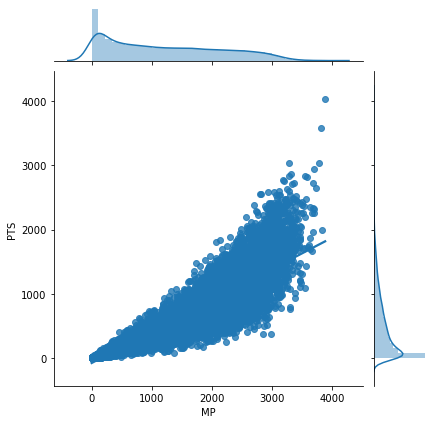

In [81]:
sns.jointplot(x='MP', y='PTS', data=seasons_stats, kind='reg')

Легко видеть связь: чем дольше  дают человеку играть, тем больше он забивает. Подавляющее большинство игроков играют мало и мало забивают. Интересная форма полумесяца. Я ожидал идеть что-то менее выраженное

In [40]:
goals_by_season = seasons_stats.groupby('Year').sum()[['2P','3P', 'FT']]
goals_by_season.head() 

,2P,3P,FT
Year,,,
1950.0,36436.0,0.0,30690.0
1951.0,23215.0,0.0,18908.0
1952.0,20526.0,0.0,17044.0
1953.0,22182.0,0.0,19992.0
1954.0,19490.0,0.0,16272.0


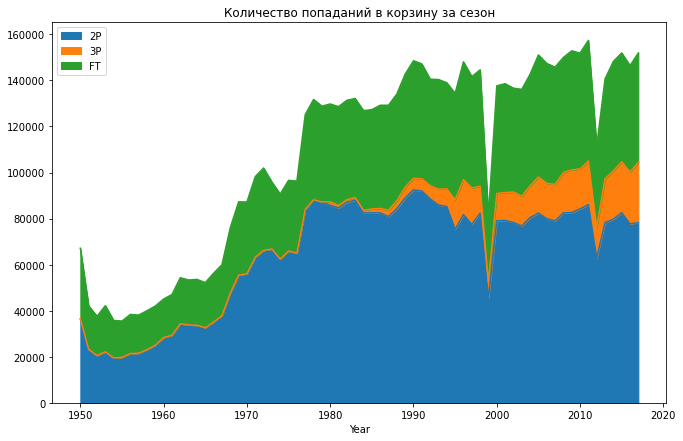

In [42]:
goals_by_season.plot(kind='area', title='Количество попаданий в корзину за сезон')

В разбивке по типам забитых голов видно, что трехочковых до 1980х не было. Дело в том, что трехочковые появились в правилах баскетбола не сразу, а только в 1980х. Видно, что количество голов за сезон росло в среднем со временем, но непонятно, что было в сезоне 1950 года. Видны два сезона с забастовками - там меньше голов. Визуально, кажется что доля свободных ударов немного возрасла

In [60]:
#players_by_collage = players.groupby('collage').agg({'born': ['min', 'max'], 'Player': 'count'}).sort_values(by = ('Player', 'count'), ascending=False)
players_by_collage = players.groupby('collage').count()[['Player']].sort_values(by = 'Player', ascending=False)
players_by_collage.head(10)

,Player
collage,
University of Kentucky,89
"University of California, Los Angeles",86
University of North Carolina,67
University of Kansas,59
Duke University,56
University of Notre Dame,51
Indiana University,49
Syracuse University,49
St. John's University,48


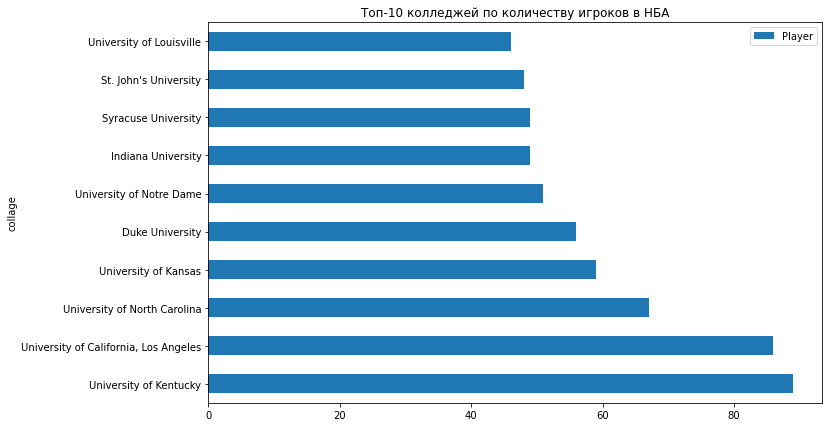

In [75]:
players_by_collage.head(10).plot(kind = 'barh', title= 'Топ-10 колледжей по количеству игроков в НБА')

В Кентуки больше всего было игроков НБА. Возможно, KFC полезно влияет на спортивные достижения местных студентнов :)

Object `panas.DataFrame.plot` not found.
